#How to Make your own OM10 sim input catalogs in 4 easy steps

In [12]:
%matplotlib inline
import om10,os
import numpy as np
import matplotlib.pyplot as plt
import triangle

In [2]:
db = om10.DB(catalog=os.path.expandvars("$OM10_DIR/data/qso_mock.fits"))

#1. Load your pre-simulated lenses
Load the catalog of simulated lenses. Pandas interface between FITS tables and DataFrames only exists in the dev version of astropy, so use native astropy tables for now!

In [3]:
print db.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
   202550        0    4 0.154  181.134 ...     0.0 8794.67 0.0  0.0    0.0
      ...      ...  ...  

#2. Place lenses on sky
Read in positions, redshifts, and magnitudes of CFHTLS galaxies from file, then match with simulated lenses by nearest neighbor.

In [4]:
db.get_sky_positions()
db.assign_sky_positions()

om10.DB: read in LRG sky position data from  /Users/mbaumer/pybin/OM10/data/CFHTLS_LRGs.txt
Mean LRG RA,DEC,z,i =  34.3807307408 -7.09643979181 0.612498 21.63331883
om10.DB: number of LRGs stored =  10000
15658


In [5]:
print db.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... L_I REFF REFF_T   RA   DEC 
--------- -------- ---- ----- -------- ... --- ---- ------ ----- -----
    14428        0    2 0.062 264.2409 ... 0.0  0.0    0.0 -99.0 -99.0
    21703        0    2 0.072 165.1962 ... 0.0  0.0    0.0 -99.0 -99.0
    31711        0    2 0.082 155.9553 ... 0.0  0.0    0.0 -99.0 -99.0
    34331        0    2 0.084 172.5838 ... 0.0  0.0    0.0 -99.0 -99.0
    51810        0    2 0.096 244.9063 ... 0.0  0.0    0.0 -99.0 -99.0
    83414        0    2 0.114   154.17 ... 0.0  0.0    0.0 -99.0 -99.0
   115074        0    2 0.128 113.5011 ... 0.0  0.0    0.0 -99.0 -99.0
   125027        0    2  0.13 247.1724 ... 0.0  0.0    0.0 -99.0 -99.0
   147709        0    2 0.138 200.9093 ... 0.0  0.0    0.0 -99.0 -99.0
   180815        0    2 0.148 185.3532 ... 0.0  0.0    0.0 -99.0 -99.0
   202550        0    4 0.154  181.134 ... 0.0  0.0    0.0 -99.0 -99.0
      ...      ...  ...   ...      ... ... ...  ...    ...   ...   ...
113167

Note that many objects have an RA,DEC of (-99,-99). This is because there were no galaxies found in the reference sample with matching magnitudes/redshifts...

In [32]:
print len(db.lenses[db.lenses['RA']> 0]), len(db.lenses)

10482 15658


#3. Simulate photometry
Add photometry by finding similar objects in SDSS/WISE. This step takes a while, so one can also load up a pre-painted catalog in this directory.

In [6]:
db.paint()

In [20]:
print db.lenses

  LENSID  FLAGTYPE NIMG ZLENS ...   MAGW3_SRC     MAGW4_SRC   SDSS_FLAG_SRC
--------- -------- ---- ----- ... ------------- ------------- -------------
    14428        0    2 0.062 ...  2.8329897868 2.05328516341           2.0
    21703        0    2 0.072 ... 2.76149741291 2.06557386144           2.0
    31711        0    2 0.082 ... 2.72177852159 1.97124268902           1.0
    34331        0    2 0.084 ... 3.00424885671 2.15719928739           1.0
    51810        0    2 0.096 ... 2.97773632994 2.17086029788           1.0
    83414        0    2 0.114 ...  11.074153724 8.46263826141           0.0
   115074        0    2 0.128 ... 2.70286331323 2.05274773804           2.0
   125027        0    2  0.13 ... 3.05597427076 2.26314157954           1.0
   147709        0    2 0.138 ... 3.19511001897 2.23217832836           2.0
   180815        0    2 0.148 ... 2.97327758323 2.07627832133           1.0
   202550        0    4 0.154 ... 2.72532942362 2.06776540353           1.0
      ...   

In [3]:
#pre-load painted, positioned catalog for this NB
db = om10.DB(catalog=os.path.expandvars("$OM10_DIR/notebooks/painted_positioned_catalog.fits"))

#4. Output flat catalog

In [5]:
out_cat = db.make_sim_input_catalog()

In [28]:
positioned_cat = out_cat[out_cat['RA'] > 0] #let's only take galaxies that were matched to a location

In [27]:
positioned_cat.write('sim_input_sample_cat.fits',format='fits')

##Exploring our positioned, painted catalog

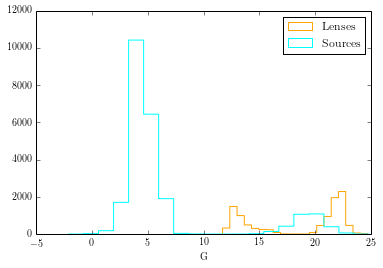

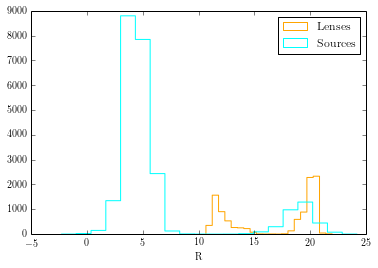

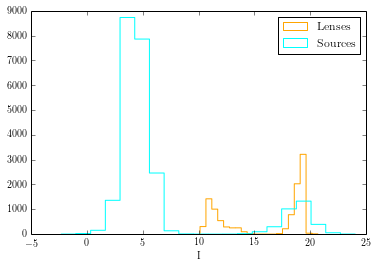

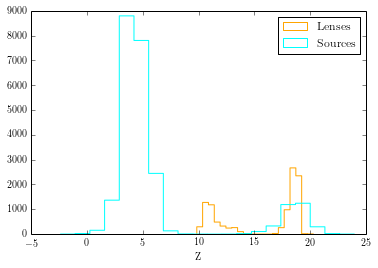

In [23]:
for var in ['G','R','I','Z']:
    plt.figure()
    plt.hist(positioned_cat[var][positioned_cat['XIMG'] == 0],bins=20,histtype='step',color='Orange',label='Lenses')
    plt.hist(positioned_cat[var][positioned_cat['XIMG'] != 0],bins=20,histtype='step',color='Cyan',label='Sources')
    plt.legend()
    plt.xlabel(var)

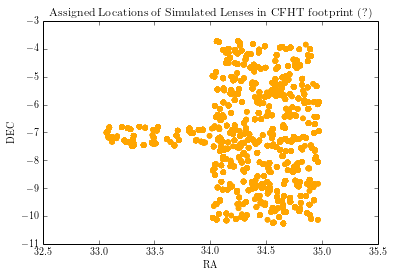

In [25]:
plt.scatter(positioned_cat['RA'],positioned_cat['DEC'],color='Orange')
plt.title('Assigned Locations of Simulated Lenses in CFHT footprint (?)')
plt.xlabel('RA')
plt.ylabel('DEC')